# Gemma 3 - 12B - Evaluation

In [1]:
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt

sys.path.append(r"C:\Users\janbe\Documents\GitHub Repos\pulse")
from src.eval.llm_analyzer import LLMAnalyzer

In [2]:
base_output_dir = r"C:\Users\janbe\Documents\GitHub Repos\pulse\output_to_keep\results_benchmark\llms\gemma3"
prompt_approaches = os.listdir(base_output_dir)

Processing sarvari_2024_aggregation_preprocessor...
Model Name: Gemma3, Task: aki, Dataset: eicu, Timestamp: 20250623_045848
Model Name: Gemma3, Task: aki, Dataset: hirid, Timestamp: 20250623_045848
Model Name: Gemma3, Task: aki, Dataset: miiv, Timestamp: 20250623_045848
Model Name: Gemma3, Task: mortality, Dataset: eicu, Timestamp: 20250623_045848
Model Name: Gemma3, Task: mortality, Dataset: hirid, Timestamp: 20250623_045848
Model Name: Gemma3, Task: mortality, Dataset: miiv, Timestamp: 20250623_045848
Model Name: Gemma3, Task: sepsis, Dataset: eicu, Timestamp: 20250624_092106
Model Name: Gemma3, Task: sepsis, Dataset: hirid, Timestamp: 20250624_092106
Model Name: Gemma3, Task: sepsis, Dataset: miiv, Timestamp: 20250624_092106
Preparing data for Gemma3 PULSE score calculation...
DATA VERIFICATION FOR PULSE SCORE
Model Type: LLM
‚úì Required columns present: True
‚úì Target Label is binary: True
‚úì Predicted Diagnosis is binary: True
‚úì Predicted Probability in [0,1]: True
‚ö†Ô∏è  I

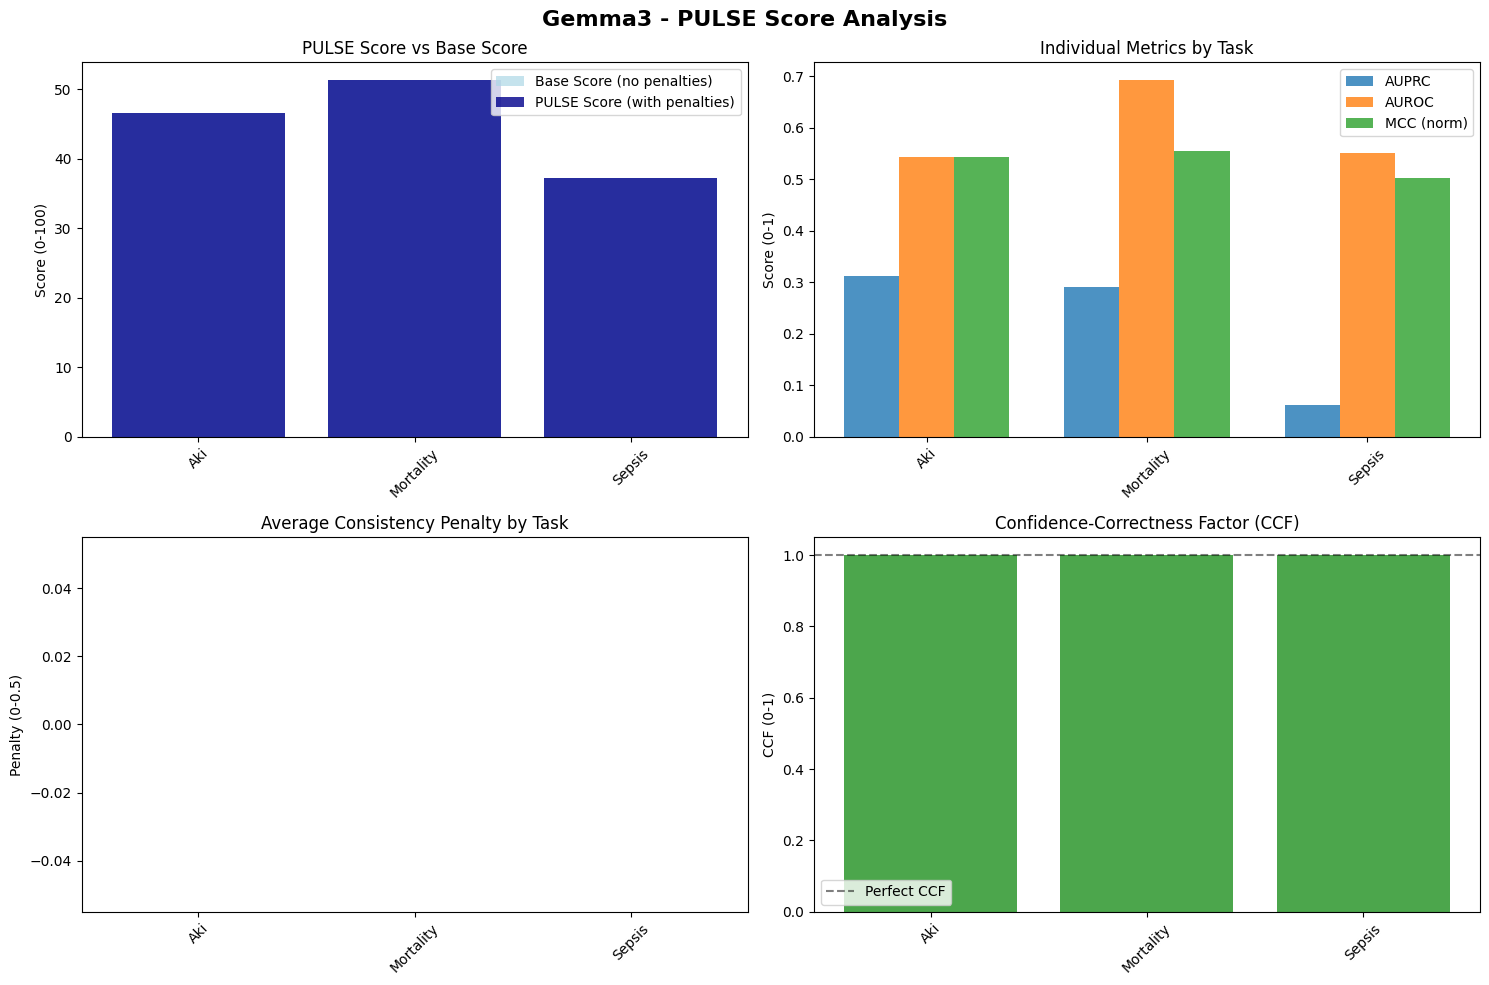

üîç KEY INSIGHTS - PULSE SCORE ANALYSIS
üéØ FINAL PULSE SCORE: 45.07/100
üìà Performance Category: Moderate performance with confidence issues

üìä AKI Analysis:
   ‚Ä¢ Base performance: 46.7/100
   ‚Ä¢ Final PULSE score: 46.7/100
   ‚Ä¢ Penalty impact: -0.0 points
   ‚Ä¢ Problematic predictions: 0 (inconsistent or invalid)

üìä MORTALITY Analysis:
   ‚Ä¢ Base performance: 51.3/100
   ‚Ä¢ Final PULSE score: 51.3/100
   ‚Ä¢ Penalty impact: -0.0 points
   ‚Ä¢ Problematic predictions: 0 (inconsistent or invalid)

üìä SEPSIS Analysis:
   ‚Ä¢ Base performance: 37.2/100
   ‚Ä¢ Final PULSE score: 37.2/100
   ‚Ä¢ Penalty impact: -0.0 points
   ‚Ä¢ Problematic predictions: 0 (inconsistent or invalid)

‚ö†Ô∏è  PREDICTION QUALITY:
   ‚Ä¢ Average penalty impact: -0.0 points per task
   ‚Ä¢ This indicates minimal issues with prediction quality
   ‚Ä¢ Issues include: confidence-prediction inconsistency & invalid task understanding

üî¨ CLINICAL IMPACT:
   ‚Ä¢ Sepsis prediction: 37.2/100
   ‚Ä

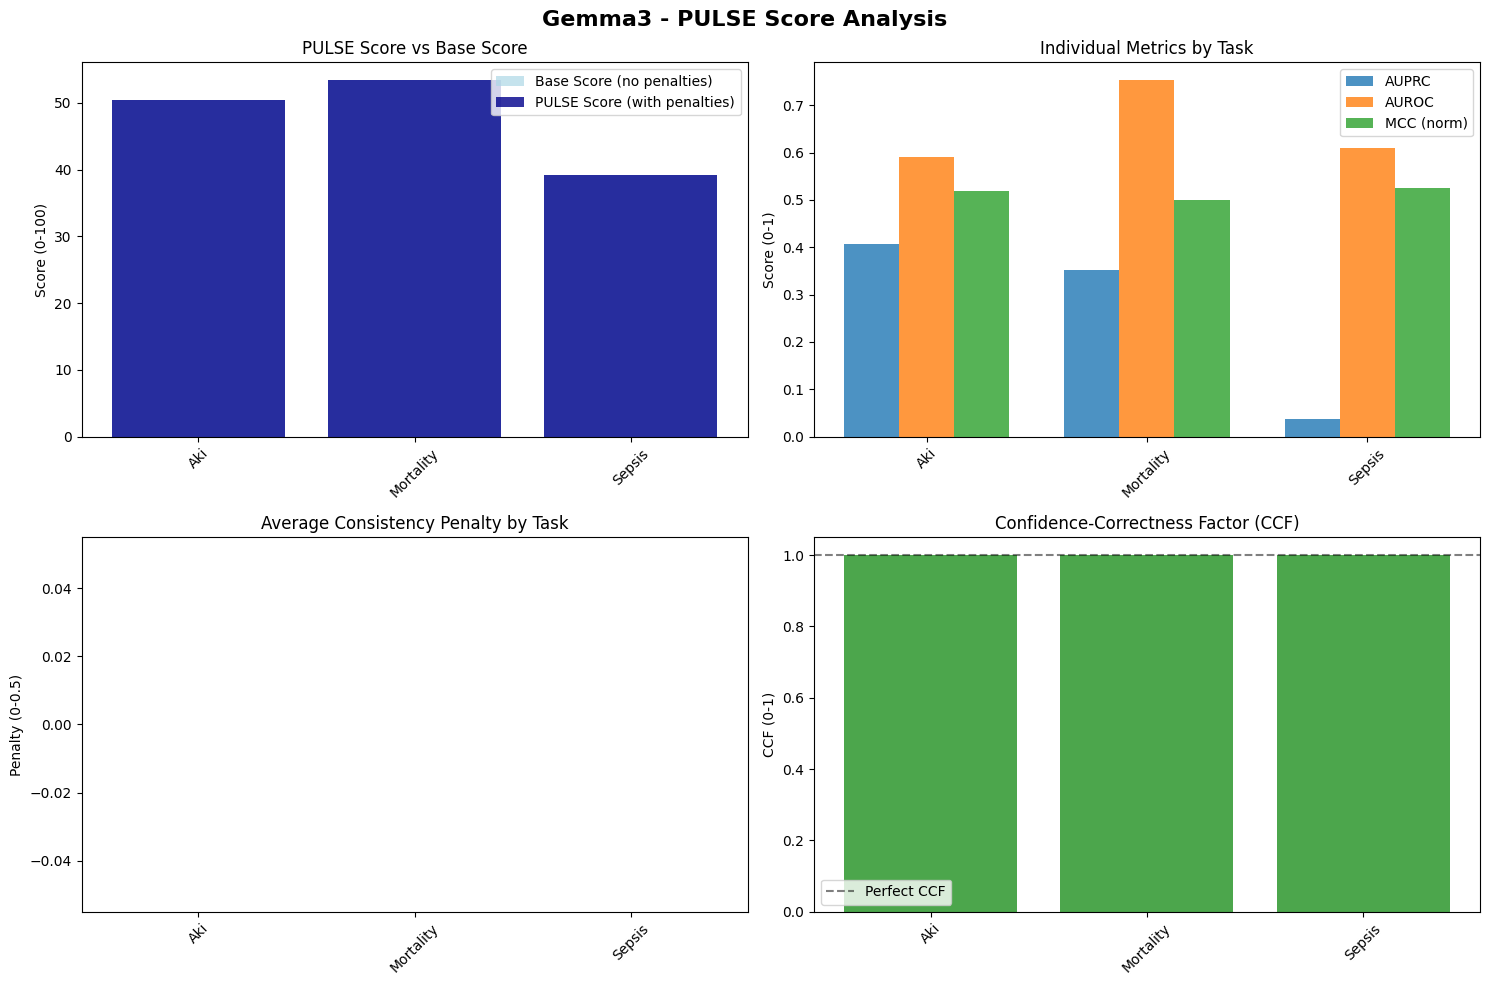

üîç KEY INSIGHTS - PULSE SCORE ANALYSIS
üéØ FINAL PULSE SCORE: 47.70/100
üìà Performance Category: Moderate performance with confidence issues

üìä AKI Analysis:
   ‚Ä¢ Base performance: 50.5/100
   ‚Ä¢ Final PULSE score: 50.5/100
   ‚Ä¢ Penalty impact: -0.0 points
   ‚Ä¢ Problematic predictions: 0 (inconsistent or invalid)

üìä MORTALITY Analysis:
   ‚Ä¢ Base performance: 53.4/100
   ‚Ä¢ Final PULSE score: 53.4/100
   ‚Ä¢ Penalty impact: -0.0 points
   ‚Ä¢ Problematic predictions: 0 (inconsistent or invalid)

üìä SEPSIS Analysis:
   ‚Ä¢ Base performance: 39.2/100
   ‚Ä¢ Final PULSE score: 39.2/100
   ‚Ä¢ Penalty impact: -0.0 points
   ‚Ä¢ Problematic predictions: 0 (inconsistent or invalid)

‚ö†Ô∏è  PREDICTION QUALITY:
   ‚Ä¢ Average penalty impact: -0.0 points per task
   ‚Ä¢ This indicates minimal issues with prediction quality
   ‚Ä¢ Issues include: confidence-prediction inconsistency & invalid task understanding

üî¨ CLINICAL IMPACT:
   ‚Ä¢ Sepsis prediction: 39.2/100
   ‚Ä

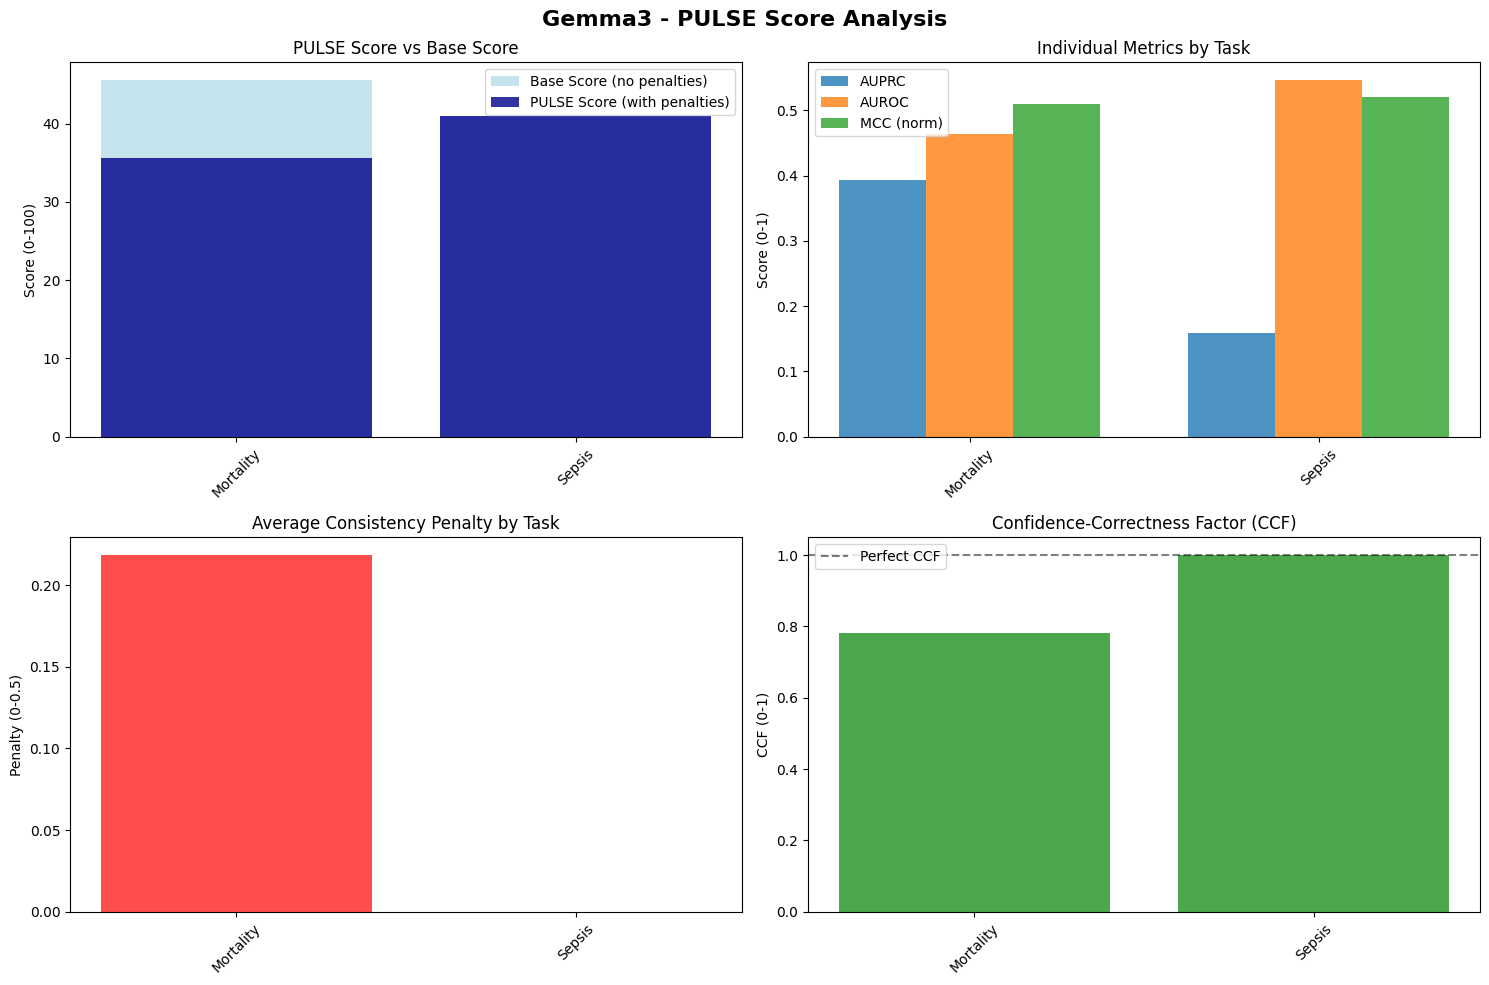

üîç KEY INSIGHTS - PULSE SCORE ANALYSIS
üéØ FINAL PULSE SCORE: 38.30/100
üìà Performance Category: Poor performance with significant confidence problems

üìä MORTALITY Analysis:
   ‚Ä¢ Base performance: 45.6/100
   ‚Ä¢ Final PULSE score: 35.6/100
   ‚Ä¢ Penalty impact: -10.0 points
   ‚Ä¢ Problematic predictions: 205 (inconsistent or invalid)

üìä SEPSIS Analysis:
   ‚Ä¢ Base performance: 41.0/100
   ‚Ä¢ Final PULSE score: 41.0/100
   ‚Ä¢ Penalty impact: -0.0 points
   ‚Ä¢ Problematic predictions: 0 (inconsistent or invalid)

‚ö†Ô∏è  PREDICTION QUALITY:
   ‚Ä¢ Average penalty impact: -5.0 points per task
   ‚Ä¢ This indicates minimal issues with prediction quality
   ‚Ä¢ Issues include: confidence-prediction inconsistency & invalid task understanding

üî¨ CLINICAL IMPACT:
   ‚Ä¢ Sepsis prediction: 41.0/100
   ‚Ä¢ Mortality prediction: 35.6/100
   ‚Ä¢ Aki prediction: 0.0/100
Best prompt approach: zhu_2024b_zero_shot_preprocessor with PULSE score: 47.69877733811831


In [3]:
from src.eval.pulse_score import PULSEScoreCalculator

best_prompt_approach = None

for prompt_approach in prompt_approaches:
    if not os.path.isdir(os.path.join(base_output_dir, prompt_approach)):
        continue
    print(f"Processing {prompt_approach}...")
    cat_files = LLMAnalyzer.categorize_files(
        [os.path.join(base_output_dir, prompt_approach)],
        verbose=False,
    )
    df_mdata = LLMAnalyzer.load_metadata(cat_files["metadata_files"])
    ps = PULSEScoreCalculator()
    pulse_score = ps.calculate_pulse_score_from_raw_data(
        df=df_mdata,
    )
    pulse_score = pulse_score["overall"]["pulse_score"]

    if best_prompt_approach is None or pulse_score > best_prompt_approach[1]:
        best_prompt_approach = (prompt_approach, pulse_score)

print(
    f"Best prompt approach: {best_prompt_approach[0]} with PULSE score: {best_prompt_approach[1]}"
)

## Model Metrics

In [4]:
df_results = LLMAnalyzer.load_metrics_from_prompt_approaches(base_output_dir, prompt_approaches)

C:\Users\janbe\Documents\GitHub Repos\pulse\src\eval\llm_analyzer.py:719: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg_df = plot_df.groupby(["Group", "Metric"], as_index=False).agg(


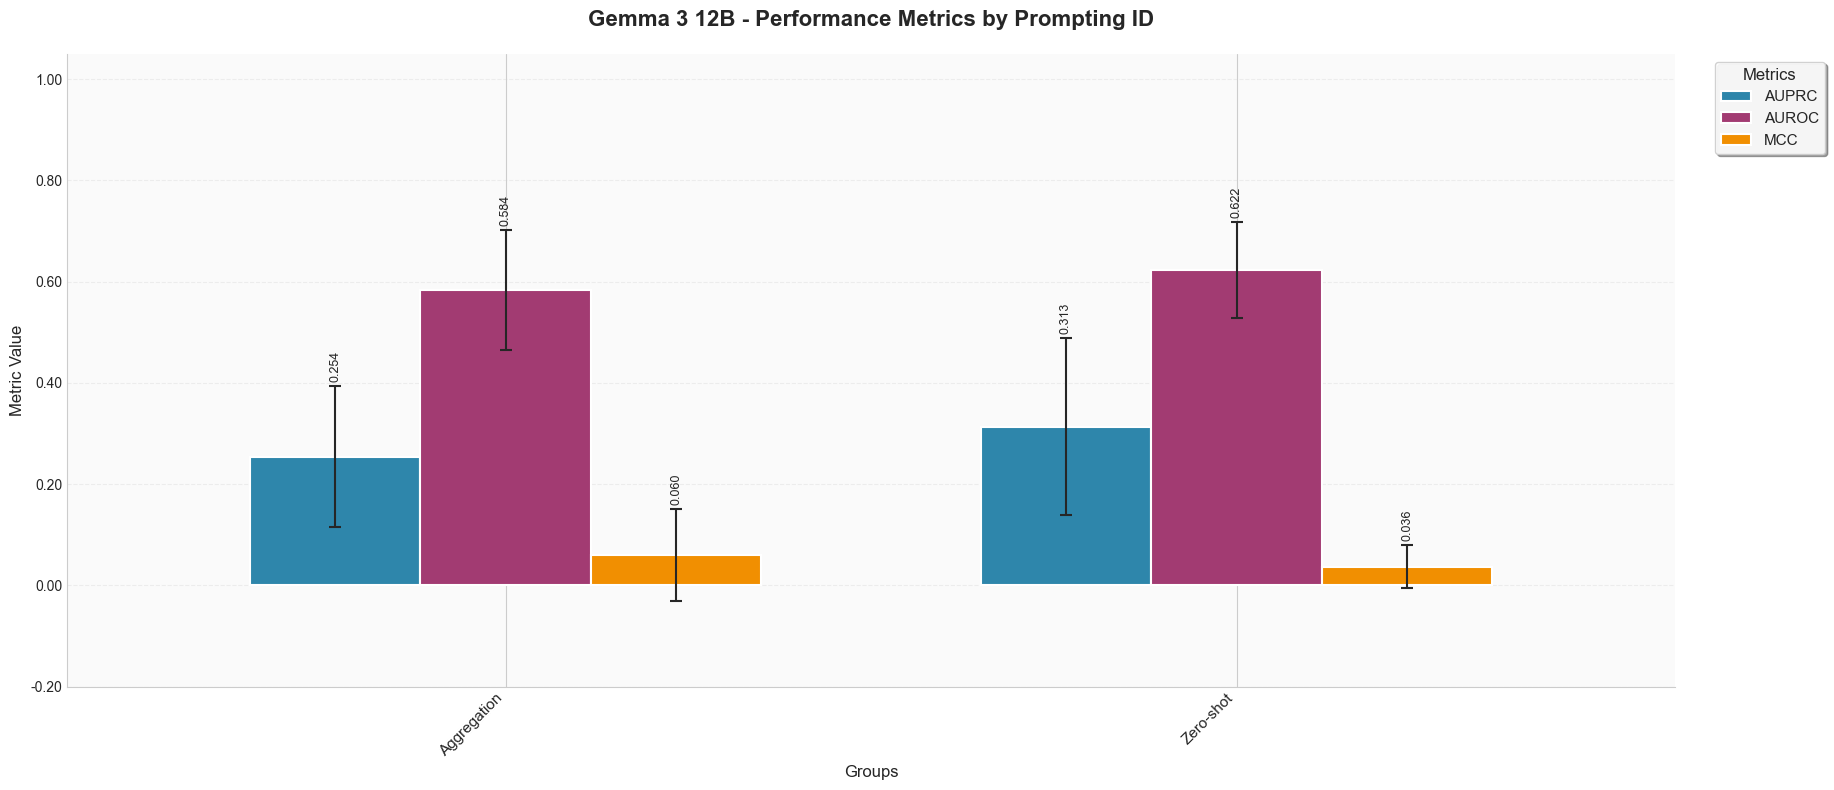

In [5]:
LLMAnalyzer.plot_metrics(
    df_results, group=["prompting_id"], title_prefix="Gemma 3 12B - ",
)

C:\Users\janbe\Documents\GitHub Repos\pulse\src\eval\llm_analyzer.py:719: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg_df = plot_df.groupby(["Group", "Metric"], as_index=False).agg(


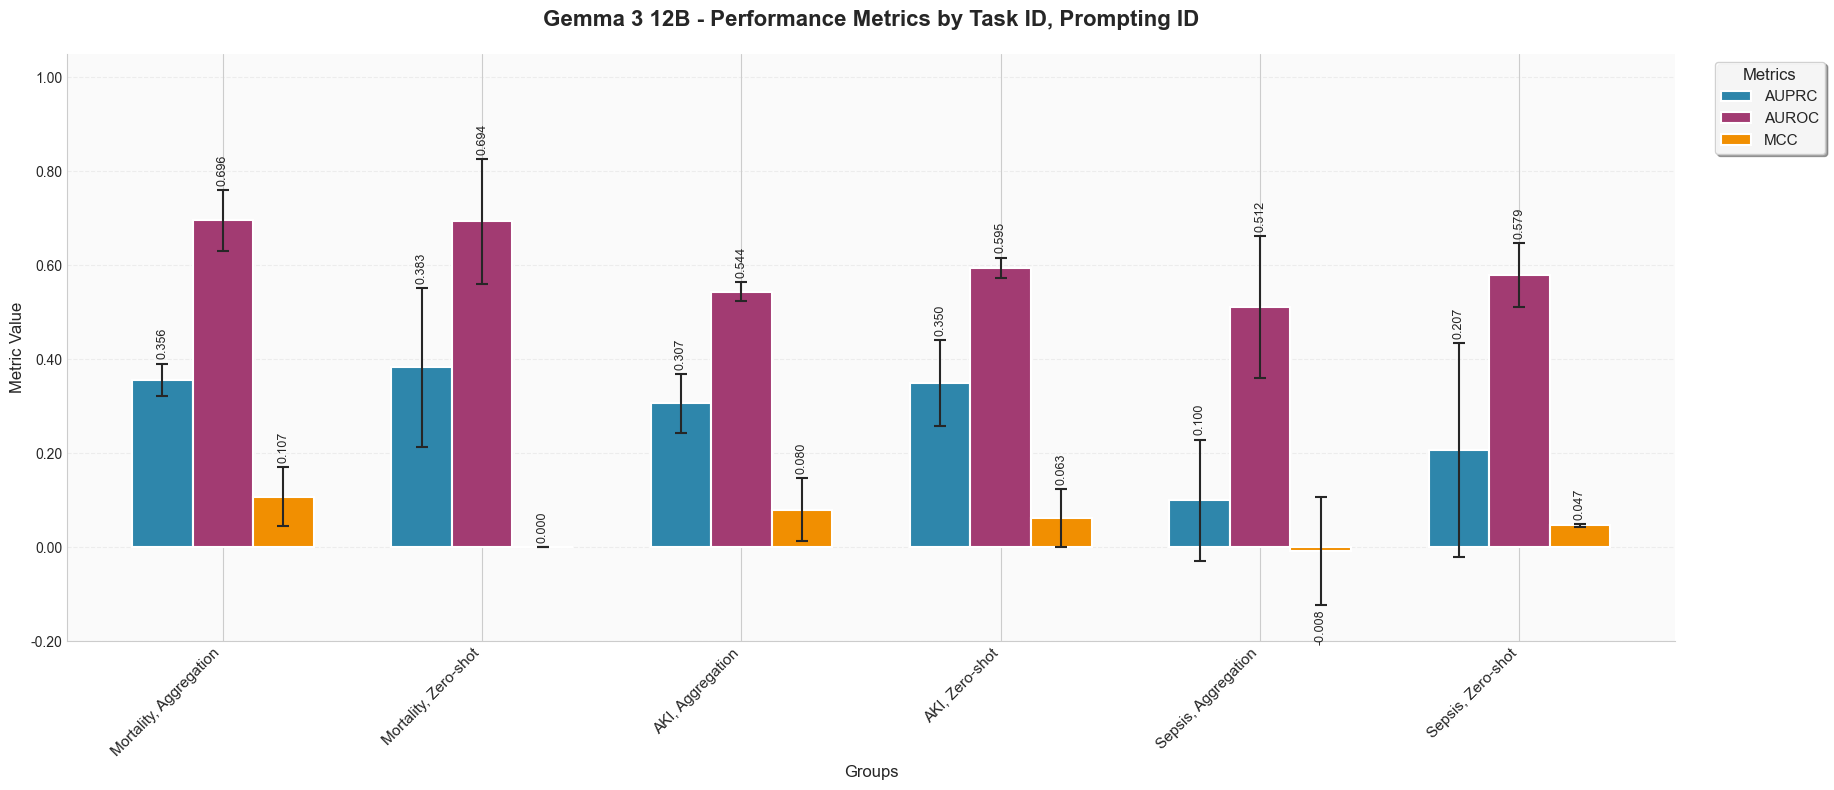

In [6]:
LLMAnalyzer.plot_metrics(
    df_results,
    group=["task_id", "prompting_id"],
    title_prefix="Gemma 3 12B - ",
)

In [7]:
import ipywidgets as widgets
from IPython.display import display

Analysis of best prompting approach

In [13]:
prompt_dropdown = widgets.Dropdown(
    options=prompt_approaches,
    value=best_prompt_approach[0],
    description='Prompt Approach:',
    style={'description_width': 'initial'}
)
display(prompt_dropdown)


Dropdown(description='Prompt Approach:', index=1, options=('sarvari_2024_aggregation_preprocessor', 'zhu_2024b‚Ä¶

In [14]:
best_approach_path = os.path.join(
    base_output_dir, prompt_dropdown.value
)
print(f"Loading metadata from: {best_approach_path}")
print("======================================================")
cat_files = LLMAnalyzer.categorize_files([best_approach_path], verbose=False)
df_mdata = LLMAnalyzer.load_metadata(cat_files["metadata_files"])

Loading metadata from: C:\Users\janbe\Documents\GitHub Repos\pulse\output_to_keep\results_benchmark\llms\gemma3\zhu_2024b_zero_shot_preprocessor


Model Name: Gemma3, Task: aki, Dataset: eicu, Timestamp: 20250624_200322
Model Name: Gemma3, Task: aki, Dataset: hirid, Timestamp: 20250624_200322
Model Name: Gemma3, Task: aki, Dataset: miiv, Timestamp: 20250624_200322
Model Name: Gemma3, Task: mortality, Dataset: eicu, Timestamp: 20250624_200322
Model Name: Gemma3, Task: mortality, Dataset: hirid, Timestamp: 20250624_200322
Model Name: Gemma3, Task: mortality, Dataset: miiv, Timestamp: 20250624_200322
Model Name: Gemma3, Task: sepsis, Dataset: eicu, Timestamp: 20250624_200322
Model Name: Gemma3, Task: sepsis, Dataset: hirid, Timestamp: 20250624_200322
Model Name: Gemma3, Task: sepsis, Dataset: miiv, Timestamp: 20250626_165736


In [15]:
LLMAnalyzer.print_approach_summary(df_mdata)

In [16]:
metrics_report = cat_files['metrics_report_files'][0]
df_metrics = pd.read_json(metrics_report)
df_metrics

model_id    task_id dataset                      prompting_id  \
0   Gemma3  mortality    eicu  zhu_2024b_zero_shot_preprocessor   
1   Gemma3  mortality   hirid  zhu_2024b_zero_shot_preprocessor   
2   Gemma3  mortality    miiv  zhu_2024b_zero_shot_preprocessor   
3   Gemma3        aki    eicu  zhu_2024b_zero_shot_preprocessor   
4   Gemma3        aki   hirid  zhu_2024b_zero_shot_preprocessor   
5   Gemma3        aki    miiv  zhu_2024b_zero_shot_preprocessor   
6   Gemma3     sepsis    eicu  zhu_2024b_zero_shot_preprocessor   
7   Gemma3     sepsis   hirid  zhu_2024b_zero_shot_preprocessor   
8   Gemma3     sepsis    miiv  zhu_2024b_zero_shot_preprocessor   

           run_id                                    metrics_summary  
0  20250624200322  {'overall': {'auroc': 0.78, 'auprc': 0.1730000...  
1  20250624200322  {'overall': {'auroc': 0.6990000000000001, 'aup...  
2  20250624200322  {'overall': {'auroc': 0.79, 'auprc': 0.504, 'n...  
3  20250624200322  {'overall': {'auroc': 0.615, 'auprc': 0.277, '...  
4  20250624200322  {'overall': {'auroc': 0.586, 'auprc': 0.374, '...  
5  20250624200322  {'overall': {'auroc': 0.5690000000000001, 'aup...  
6  20250624200322  {'overall': {'auroc': 0.61, 'auprc': 0.038, 'n...  
7  20250624200322  {'overall': {'auroc': 0.618, 'auprc': 0.517, '...  
8  20250626165736  {'overall': {'auroc': 0.47700000000000004, 'au...

In [17]:
# Save metrics to results.json using the LLMAnalyzer method
added_count, updated_count = LLMAnalyzer.save_metrics_to_results_json(
    metrics_report_path=metrics_report,
    results_json_path="../docs/results.json"
)

Updating existing record: model_id='Gemma3', prompting_id='zhu_2024b_zero_shot_preprocessor', task_id='mortality', dataset='eicu', run_id='20250624_200322'
Updating existing record: model_id='Gemma3', prompting_id='zhu_2024b_zero_shot_preprocessor', task_id='mortality', dataset='hirid', run_id='20250624_200322'
Updating existing record: model_id='Gemma3', prompting_id='zhu_2024b_zero_shot_preprocessor', task_id='mortality', dataset='miiv', run_id='20250624_200322'
Updating existing record: model_id='Gemma3', prompting_id='zhu_2024b_zero_shot_preprocessor', task_id='aki', dataset='eicu', run_id='20250624_200322'
Updating existing record: model_id='Gemma3', prompting_id='zhu_2024b_zero_shot_preprocessor', task_id='aki', dataset='hirid', run_id='20250624_200322'
Updating existing record: model_id='Gemma3', prompting_id='zhu_2024b_zero_shot_preprocessor', task_id='aki', dataset='miiv', run_id='20250624_200322'
Updating existing record: model_id='Gemma3', prompting_id='zhu_2024b_zero_shot_p